<a href="https://colab.research.google.com/github/WestonMadeira1/HW_2/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

# Data Visualisation

import matplotlib.pyplot as plt
import seaborn as sns

#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/My Drive/ML Data/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
housing.shape

(545, 13)

In [ ]:
housing.isnull().sum()*100/housing.shape[0]

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

In [ ]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

housing[varlist] = housing[varlist].apply(binary_map)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [ ]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [ ]:
varlist_1 = ['price', 'area', 'bedrooms', 'bathrooms', 'stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']
df_train = df_train[varlist_1]
df_train.head

<bound method NDFrame.head of         price      area  bedrooms  bathrooms   stories  mainroad  guestroom  \
22   0.596970  0.432609       0.4   0.000000  0.000000         1          1   
41   0.527273  0.314954       0.4   0.333333  1.000000         1          0   
91   0.404242  0.342105       0.2   0.000000  0.000000         1          1   
118  0.363636  0.319131       0.4   0.000000  0.000000         1          0   
472  0.109091  0.124896       0.6   0.000000  0.333333         1          0   
..        ...       ...       ...        ...       ...       ...        ...   
526  0.048485  0.093567       0.2   0.000000  0.000000         1          0   
53   0.484848  0.230716       0.4   0.333333  1.000000         1          0   
350  0.175758  0.110276       0.2   0.000000  0.333333         1          0   
79   0.424242  0.289891       0.4   0.333333  0.666667         1          1   
520  0.060606  0.408243       0.2   0.000000  0.000000         1          0   

     basement  hotwat

In [ ]:
df_test = df_test[varlist_1]
df_test.head

<bound method NDFrame.head of         price      area  bedrooms  bathrooms   stories  mainroad  guestroom  \
265  0.248485  0.088172  0.333333        0.0  0.333333         1          0   
54   0.531987  0.311828  0.333333        0.5  0.333333         1          1   
171  0.329966  0.617849  0.333333        0.0  0.000000         1          0   
244  0.262626  0.263082  0.333333        0.0  0.333333         1          1   
268  0.246465  0.236559  0.666667        0.0  0.333333         1          0   
..        ...       ...       ...        ...       ...       ...        ...   
451  0.127946  0.365591  0.000000        0.0  0.000000         1          0   
320  0.215488  0.191398  0.333333        0.0  0.333333         1          0   
424  0.148148  0.103943  0.333333        0.0  0.333333         0          0   
338  0.198653  0.152688  0.000000        0.0  0.333333         1          1   
373  0.175084  0.096774  0.000000        0.0  0.333333         1          0   

     basement  hotwat

In [ ]:
X_1 = df_train.values[:,1]
X_2 = df_train.values[:,2]
X_3 = df_train.values[:,3]
X_4 = df_train.values[:,4]
X_5 = df_train.values[:,5]
X_6 = df_train.values[:,6]
X_7 = df_train.values[:,7]
X_8 = df_train.values[:,8]
X_9 = df_train.values[:,9]
X_10 = df_train.values[:,10]
X_11= df_train.values[:,11]
Y_T = df_train.values[:,0]

T_1 = df_test.values[:,1]
T_2 = df_test.values[:,2]
T_3 = df_test.values[:,3]
T_4 = df_test.values[:,4]
T_5 = df_test.values[:,5]
T_6 = df_test.values[:,6]
T_7 = df_test.values[:,7]
T_8 = df_test.values[:,8]
T_9 = df_test.values[:,9]
T_10 = df_test.values[:,10]
T_11 = df_test.values[:,11]
Y_V = df_test.values[:,0]

m = len(Y_T)
n = len(Y_V)

print('X1 = ', X_1[:5])
print('X2 = ', X_2[:5])
print('X3 = ', X_3[:5])
print('X4 = ', X_4[:5])
print('X5 = ', X_5[:5])
print('Y Train = ', Y_T[:5])
print('m = ', m)
print('n = ', n)

X1 =  [0.4326093  0.31495405 0.34210526 0.31913116 0.12489557]
X2 =  [0.4 0.4 0.2 0.4 0.6]
X3 =  [0.         0.33333333 0.         0.         0.        ]
X4 =  [0.         1.         0.         0.         0.33333333]
X5 =  [1. 1. 1. 1. 1.]
Y Train =  [0.5969697  0.52727273 0.40424242 0.36363636 0.10909091]
m =  436
n =  109


In [ ]:
X1 = X_1.reshape(m, 1)
print(X1[:10])
X2 = X_2.reshape(m, 1)
print(X2[:10])
X3 = X_3.reshape(m, 1)
print(X3[:10])
X4 = X_4.reshape(m, 1)
print(X4[:10])
X5 = X_5.reshape(m, 1)
print(X5[:10])
X6 = X_6.reshape(m, 1)
X7 = X_7.reshape(m, 1)
X8 = X_8.reshape(m, 1)
X9 = X_9.reshape(m, 1)
X10 = X_10.reshape(m, 1)
X11 = X_11.reshape(m, 1)

T1 = T_1.reshape(n,1)
T2 = T_2.reshape(n,1)
T3 = T_3.reshape(n,1)
T4 = T_4.reshape(n,1)
T5 = T_5.reshape(n,1)
T6 = T_6.reshape(n,1)
T7 = T_7.reshape(n,1)
T8 = T_8.reshape(n,1)
T9 = T_9.reshape(n,1)
T10 = T_10.reshape(n,1)
T11 = T_11.reshape(n,1)


X0 = np.ones((m, 1))
X0[:5]
T0 = np.ones((n,1))

[[0.4326093 ]
 [0.31495405]
 [0.34210526]
 [0.31913116]
 [0.12489557]
 [0.14021164]
 [0.49596213]
 [0.446533  ]
 [0.08103592]
 [0.15288221]]
[[0.4]
 [0.4]
 [0.2]
 [0.4]
 [0.6]
 [0.2]
 [0.6]
 [0.4]
 [0.4]
 [0.2]]
[[0.        ]
 [0.33333333]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [1.        ]
 [0.        ]
 [0.33333333]
 [0.        ]]
[[0.        ]
 [1.        ]
 [0.        ]
 [0.        ]
 [0.33333333]
 [0.        ]
 [1.        ]
 [0.        ]
 [0.33333333]
 [0.        ]]
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [ ]:
X_T = np.hstack((X0, X1, X2, X3, X4, X5,X6,X7,X8,X9,X10,X11))
print(X_T[:10])
X_V = np.hstack((T0, T1, T2, T3, T4, T5,T6,T7,T8,T9,T10,T11))

[[1.         0.4326093  0.4        0.         0.         1.
  1.         1.         0.         1.         0.33333333 0.        ]
 [1.         0.31495405 0.4        0.33333333 1.         1.
  0.         0.         0.         1.         0.         1.        ]
 [1.         0.34210526 0.2        0.         0.         1.
  1.         1.         0.         0.         0.66666667 1.        ]
 [1.         0.31913116 0.4        0.         0.         1.
  0.         1.         0.         1.         0.         1.        ]
 [1.         0.12489557 0.6        0.         0.33333333 1.
  0.         0.         0.         0.         1.         0.        ]
 [1.         0.14021164 0.2        0.         0.         1.
  0.         0.         0.         0.         0.         0.        ]
 [1.         0.49596213 0.6        1.         1.         1.
  0.         0.         0.         1.         1.         0.        ]
 [1.         0.446533   0.4        0.         0.         1.
  0.         0.         0.         0.

In [ ]:
theta = np.zeros(12)
theta

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
def compute_cost(X,Y,theta):
   predictions = X.dot(theta)
   errors = np.subtract(predictions, Y)
   sqrErrors = np.square(errors)
   J = 1 / (2 * m) * np.sum(sqrErrors)
   return J

In [ ]:
def gradient_descent(X, Y, theta, alpha, iterations):
    m = len(Y)  # Number of training examples
    loss_history = []

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, Y)
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta -= sum_delta
        #cost_history[i] = compute_cost(X, Y, theta)
        loss = np.mean(np.square(errors))
        loss_history.append(loss)

    return theta, loss_history

In [ ]:
theta = [0., 0., 0., 0., 0., 0.,0.,0.,0.,0.,0.,0.]
iterations = 1100
alpha = 0.01

In [ ]:
theta_t, loss_history_t = gradient_descent(X_T, Y_T, theta, alpha, iterations)
print('Final value of theta for training =', theta_t)
print('loss history of training =', loss_history_t)

Final value of theta for training = [0.05006149 0.08446822 0.05880678 0.09923925 0.09745533 0.0666041
 0.04741432 0.02602351 0.04241568 0.0949654  0.07807915 0.05762836]
loss history of training = [0.09561325712622475, 0.09170524971073432, 0.08799017327134792, 0.08445846799774648, 0.08110104787872191, 0.07790927721956262, 0.07487494832329492, 0.0719902602780968, 0.06924779879605944, 0.06664051705118931, 0.06416171746712562, 0.06180503440750323, 0.05956441772422361, 0.05743411712111377, 0.05540866729256057, 0.05348287379871064, 0.05165179964073013, 0.04991075250142725, 0.04825527261826101, 0.046681121257393085, 0.045184269758994165, 0.04376088912549136, 0.04240734012584791, 0.04112016389029866, 0.03989607297123364, 0.03873194284712603, 0.03762480384754619, 0.03657183347839179, 0.035570349127498166, 0.034617801131776545, 0.03371176618796173, 0.032849941089939265, 0.03203013677646586, 0.03125027267389938, 0.030508371319316916, 0.02980255325012408, 0.029131032146947896, 0.02849211021725964

In [ ]:
theta_v, loss_history_v = gradient_descent(X_V, Y_V, theta, alpha, iterations)
print('Final value of theta for validation =', theta_v)
print('loss history of validation =', loss_history_v)

Final value of theta for validation = [ 0.05029409  0.09301618  0.08757832  0.07611477  0.1035606   0.0340954
  0.00782869  0.04478851 -0.00492509  0.11432137  0.11773553  0.09526735]
loss history of validation = [0.10681967587197252, 0.10239695966902829, 0.09819386585077577, 0.09419942646893986, 0.0904032215324241, 0.08679535163058807, 0.08336641192430815, 0.0801074674364855, 0.07701002957707914, 0.07406603384098434, 0.07126781862016025, 0.06860810507433647, 0.06607997800741024, 0.06367686769928885, 0.061392532645441276, 0.059221043158808676, 0.0571567657909888, 0.05519434853176243, 0.05332870674807413, 0.05155500982552347, 0.04986866847726807, 0.04826532268699329, 0.04674083025427008, 0.04529125591220411, 0.04391286098878419, 0.04260209358476555, 0.04135557924228128, 0.04017011207966418, 0.039042646369186584, 0.037970288535589376, 0.03695028955437651, 0.03598003772990258, 0.03505705183427808, 0.03417897458906547, 0.033343566472639696, 0.032548699836942294, 0.03179235331817151, 0.0310

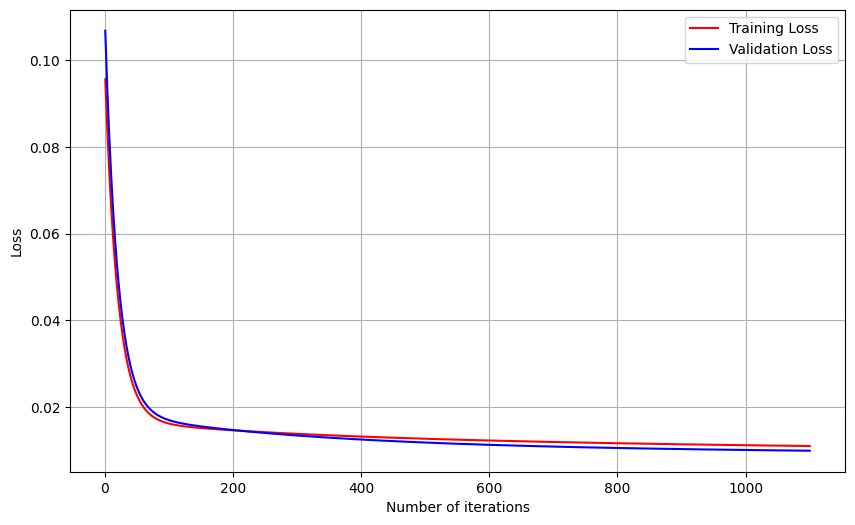

In [ ]:
plt.plot(range(1, iterations + 1), loss_history_t, color='red', label='Training Loss')
plt.plot(range(1, iterations + 1),loss_history_v, color='blue', label='Validation Loss')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.legend()
#plt.title('Convergence of gradient descent')

# Show the plot
plt.show()